In [1]:
from tsai.all import *
from tsai.basics import *
from tqdm import tqdm

DATASETS = get_UCR_univariate_list ()


def isunivariate(X):
    return True if X.shape[1] ==1 else False

data_info ={}
max_classes = 0
for dataname in tqdm(DATASETS):
    data_info[dataname] = {}
    X, y, splits = get_classification_data(dataname, split_data=False)
    uni = isunivariate(X)

    data_info[dataname]['feature_dim'] = 'univariate' if uni else 'multivariate'
    data_info[dataname]['N_samples'] = X.shape[0]
    data_info[dataname]['N_len'] = X.shape[2]

    Y_df = pd.DataFrame(np.array(y.tolist())).astype('int')

    n_c = len(Y_df[0].unique())
    print(n_c)

    if n_c > max_classes:
        max_classes = n_c

    data_info[dataname]['type'] = 'multiclass' if n_c >2 else 'binary'

    data_info[dataname]['n_classes'] = n_c
 
    Y_df['1'] = Y_df[0]
    grouped_df = Y_df.groupby([0]).count()/len(Y_df)

    #data_info[dataname]['class ratio'] = grouped_df.values






 27%|██▋       | 35/128 [00:00<00:00, 174.06it/s]

10
37
10
10
10
3
5
2
2
3
4
3
2
3
4
2
2
12
12
12
24
4
3
2
6
7
2
2
2
2
5
2
7
12
12
4


 41%|████▏     | 53/128 [00:00<00:00, 159.19it/s]

14
4
14
50
7
2
2
2
2
18
26
26
26
6
6
2
2
2
2
2
2
5
2
2
7
3
3
11
2
3


 67%|██████▋   | 86/128 [00:00<00:00, 133.90it/s]

2
7
8
3
10
10
3
2
6
5
5
2
42
42
4
6
2
39
10
52
52
52
11
7
2


 92%|█████████▏| 118/128 [00:00<00:00, 137.46it/s]

3
2
6
3
4
3
2
6
5
10
2
60
3
3
2
2
3
2
15
6
6
2
2
4
2
4
3


100%|██████████| 128/128 [00:00<00:00, 139.38it/s]

8
8
8
8
2
2
25
5
2
2


128

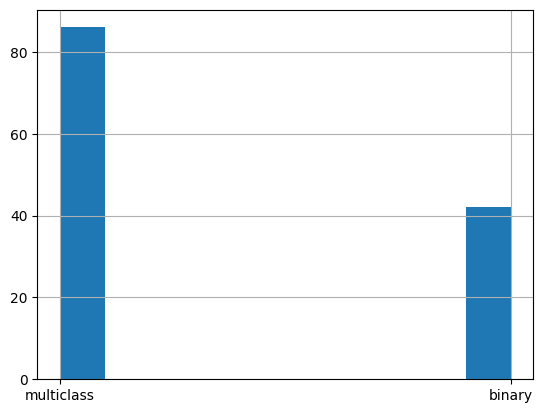

In [2]:
DATA_df =  pd.DataFrame(data_info).T

DATA_df.type.hist()

len(DATA_df)

In [3]:
import pandas as pd


NUMBER_CLASSES = [2, 10, 30]
SEQUENCE_LENGTH = [250, 1000, 1500]


DATA_df["n_classes_bin"] = pd.cut(
    DATA_df["n_classes"],
    bins=[-float("inf")] + NUMBER_CLASSES + [float("inf")],
    labels=["<=2", "2-10", "10-30", ">30"]
)

DATA_df["N_len_bin"] = pd.cut(
    DATA_df["N_len"],
    bins=[-float("inf")] + SEQUENCE_LENGTH + [float("inf")],
    labels=["<=250", "250-1000", "1000-1500", ">1500"]
)

MAP_METHODS = {}

for (cls_bin, len_bin), group in DATA_df.groupby(["n_classes_bin", "N_len_bin"]):
    MAP_METHODS[(cls_bin, len_bin)] = group.index.tolist()



check_sum =0
for k,v in MAP_METHODS.items():
    check_sum+=len(v)



MAP_METHODS

{('<=2', '<=250'): ['Chinatown',
  'DistalPhalanxOutlineCorrect',
  'ECG200',
  'ECGFiveDays',
  'GunPoint',
  'GunPointAgeSpan',
  'GunPointMaleVersusFemale',
  'GunPointOldVersusYoung',
  'ItalyPowerDemand',
  'MiddlePhalanxOutlineCorrect',
  'MoteStrain',
  'PhalangesOutlinesCorrect',
  'PowerCons',
  'ProximalPhalanxOutlineCorrect',
  'SonyAIBORobotSurface1',
  'SonyAIBORobotSurface2',
  'Strawberry',
  'TwoLeadECG',
  'Wafer',
  'Wine'],
 ('<=2', '250-1000'): ['BeetleFly',
  'BirdChicken',
  'Coffee',
  'Computers',
  'DodgerLoopGame',
  'DodgerLoopWeekend',
  'Earthquakes',
  'FordA',
  'FordB',
  'FreezerRegularTrain',
  'FreezerSmallTrain',
  'Ham',
  'Herring',
  'Lightning2',
  'ShapeletSim',
  'ToeSegmentation1',
  'ToeSegmentation2',
  'WormsTwoClass',
  'Yoga'],
 ('<=2', '1000-1500'): ['SemgHandGenderCh2'],
 ('<=2', '>1500'): ['HandOutlines', 'HouseTwenty'],
 ('2-10', '<=250'): ['BME',
  'CBF',
  'ChlorineConcentration',
  'DistalPhalanxOutlineAgeGroup',
  'DistalPhalanxTW

In [4]:
MAP_dict = {'classes':[],'lenght':[],'Name':[]}

for k,v, in MAP_METHODS.items():
    for m in v:
        MAP_dict['classes'].append(k[0])
        MAP_dict['lenght'].append(k[1])
        MAP_dict['Name'].append(m)


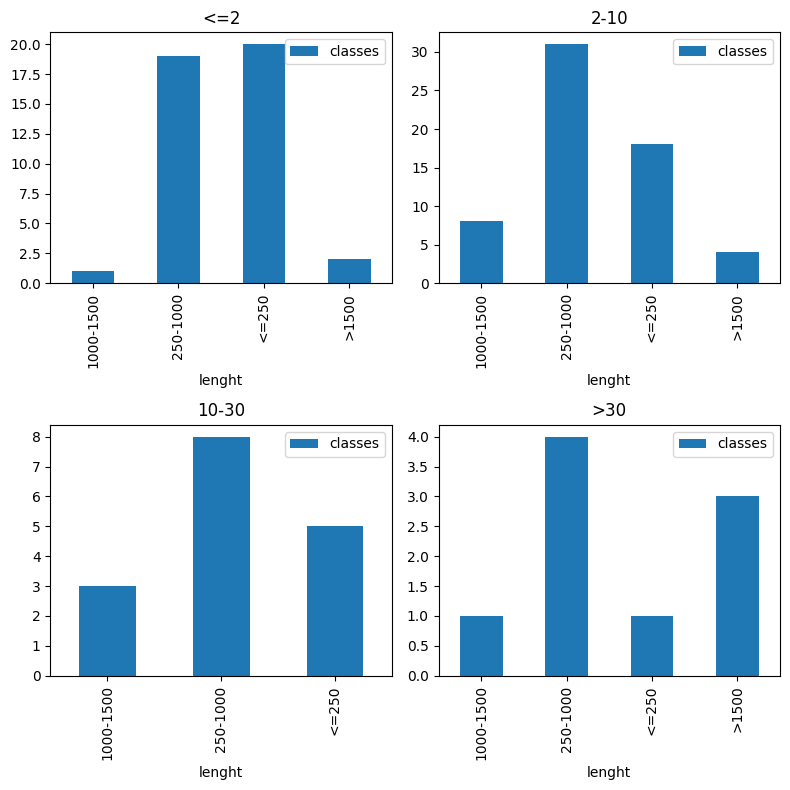

In [6]:
df_DATASETS = pd.DataFrame(MAP_dict)


fig, ax = plt.subplots(2,2,figsize=(8,8))
i=0
j=0
for _,key in enumerate(df_DATASETS['classes'].unique()):
    df_DATASETS[df_DATASETS['classes']==key][['classes','lenght']].groupby(['lenght']).count().plot.bar(ax=ax[i,j])
    ax[i,j].set_title(key)
    if j==1:
        i=1
        j=0
    else:
        j+=1

fig.tight_layout()

In [23]:


import json

path= "../configs/SETS"

SORTED_DICT = {}
for k,v in MAP_METHODS.items():
    print(k[0],k[1])
    SORTED_DICT[k[0]] = {}


for k,v in MAP_METHODS.items():
    print(k[0],k[1])
    SORTED_DICT[k[0]][k[1]] = v
    

for i,k in enumerate(SORTED_DICT.keys()):
    os.makedirs(f"{path}/SET-{i}", exist_ok=True)
    for j,subkey in enumerate(SORTED_DICT[k].keys()):
        dump_dict = {subkey:SORTED_DICT[k][subkey]}
        print(dump_dict)
        with open(f"{path}/SET-{i}/Set-{i}{j}.json","w") as f:
            json.dump(dump_dict,f)

    




<=2 <=250
<=2 250-1000
<=2 1000-1500
<=2 >1500
2-10 <=250
2-10 250-1000
2-10 1000-1500
2-10 >1500
10-30 <=250
10-30 250-1000
10-30 1000-1500
>30 <=250
>30 250-1000
>30 1000-1500
>30 >1500
<=2 <=250
<=2 250-1000
<=2 1000-1500
<=2 >1500
2-10 <=250
2-10 250-1000
2-10 1000-1500
2-10 >1500
10-30 <=250
10-30 250-1000
10-30 1000-1500
>30 <=250
>30 250-1000
>30 1000-1500
>30 >1500
{'<=250': ['Chinatown', 'DistalPhalanxOutlineCorrect', 'ECG200', 'ECGFiveDays', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'ItalyPowerDemand', 'MiddlePhalanxOutlineCorrect', 'MoteStrain', 'PhalangesOutlinesCorrect', 'PowerCons', 'ProximalPhalanxOutlineCorrect', 'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'Strawberry', 'TwoLeadECG', 'Wafer', 'Wine']}
{'250-1000': ['BeetleFly', 'BirdChicken', 'Coffee', 'Computers', 'DodgerLoopGame', 'DodgerLoopWeekend', 'Earthquakes', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Ham', 'Herring', 'Lightning2', 'ShapeletSi

{('<=2', '<=250'): ['Chinatown',
  'DistalPhalanxOutlineCorrect',
  'ECG200',
  'ECGFiveDays',
  'GunPoint',
  'GunPointAgeSpan',
  'GunPointMaleVersusFemale',
  'GunPointOldVersusYoung',
  'ItalyPowerDemand',
  'MiddlePhalanxOutlineCorrect',
  'MoteStrain',
  'PhalangesOutlinesCorrect',
  'PowerCons',
  'ProximalPhalanxOutlineCorrect',
  'SonyAIBORobotSurface1',
  'SonyAIBORobotSurface2',
  'Strawberry',
  'TwoLeadECG',
  'Wafer',
  'Wine'],
 ('<=2', '250-1000'): ['BeetleFly',
  'BirdChicken',
  'Coffee',
  'Computers',
  'DodgerLoopGame',
  'DodgerLoopWeekend',
  'Earthquakes',
  'FordA',
  'FordB',
  'FreezerRegularTrain',
  'FreezerSmallTrain',
  'Ham',
  'Herring',
  'Lightning2',
  'ShapeletSim',
  'ToeSegmentation1',
  'ToeSegmentation2',
  'WormsTwoClass',
  'Yoga'],
 ('<=2', '1000-1500'): ['SemgHandGenderCh2'],
 ('<=2', '>1500'): ['HandOutlines', 'HouseTwenty'],
 ('2-10', '<=250'): ['BME',
  'CBF',
  'ChlorineConcentration',
  'DistalPhalanxOutlineAgeGroup',
  'DistalPhalanxTW

In [38]:
int(286/5)

57